HTTP

HTTP (protocolo de transferencia de hipertexto) es un protocolo de internet, un conjunto de reglas para transferir datos entre dos sistemas informáticos, generalmente, entre un navegador web y un sitio web. Pero un navegador web no es el único tipo de cliente posible, también puede ser cualquier otro programa, incluido un programa de Python. A continuación, aprenderemos a trabajar con recursos web utilizando Python y herramientas de línea de comandos.

API REST

Los recursos web son excelentes para compartir datos y brindar servicios. Los utilizamos para hacer cálculos, escuchar música, etc. Se supone que un usuario promedio de un servicio no posee ningún conocimiento especial sobre programación, por lo que suele utilizar una interfaz gráfica que le permite interactuar con el servidor (un navegador, en el caso de los recursos web). Pero, ¿y si queremos recuperar algunos datos de la web automáticamente cada hora 24/7? ¿O si necesitamos usar algún servicio como parte de un pipeline de datos más grande? Abrir un navegador y hacer las cosas de forma manual no parece la mejor opción, así que ahí es donde entra en juego la API web.

API significa interfaz de programación de aplicaciones. Especifica cómo un programa (en contraste con una persona) puede interactuar con un servicio o datos. REST (Representational State Transfer) es un conjunto de principios (estilo de arquitectura de software) desarrollado en el año 2000 y ampliamente utilizado para aplicaciones web en la actualidad. Según el REST, hay dos caras: cliente y servidor, que son bastante independientes.

El cliente usa el servidor para acceder a recursos, el URI (Identificador uniforme de recursos) es todo lo que el cliente necesita saber, y toda la magia ocurre del lado del servidor. URI para recursos web se conoce como URL (Localizador uniforme de recursos). Interactúan con solicitudes HTTP autosuficientes, que son livianas y universales. Un cliente realiza su petición llamando a una URL (por tanto, una llamada es todo intento de obtener una respuesta de un servidor), y el servidor devuelve su respuesta.

El formato JSON legible por humanos y multilingüe se usa comúnmente para el intercambio de datos. El servidor no considera interacciones previas ni el origen de la solicitud y funciona de manera uniforme, dando la misma respuesta a la misma solicitud. El cliente no intenta cambiar el estado del servidor. Además, los URI y los mensajes de error deben ser legibles y autoexplicativos.

Hay una variedad de métodos dentro del estándar HTTP, los más útiles se llaman GET y POST. Sus nombres se deben a las funciones que realizan estos dos métodos: GET se utiliza para obtener algo de un servidor y POST para modificar algo en un servidor.

Python es una herramienta muy práctica para trabajar con recursos web. Utilizaremos la librería requests, muy popular, para aprender a obtener datos de recursos web.

Obtener datos con API

Veamos cómo se aplica el método GET en la vida real. Digamos que necesitas información sobre los tipos de cambio actuales para calcular el valor de una cartera de inversiones en USD. ¿Cómo puedes obtener las tarifas de forma automática? En primer lugar, tenemos que encontrar una API web que proporcione datos en respuesta a las solicitudes correspondientes. Comenzaremos con una que no requiere ninguna autenticación.

Aquí está la URL base:  https://api.frankfurter.app. Parece un enlace de internet normal. Visita www.frankfurter.app para saber cómo usarla. Podemos descubrir que /latest nos dirige a las tarifas actuales. La URL final https://api.frankfurter.app/latest se denomina endpoint. El uso básico es:

In [1]:
import requests

response = requests.get("https://api.frankfurter.app/latest")
print(response)

<Response [200]>


Aquí usamos la función get() de la librería requests incorporada para obtener algo del recurso proporcionado. Lo que recibimos fue un objeto response(documentado aquí), que consta de varios conjuntos de información: código de estado, encabezado, contenido y otros. Cuando tratamos de examinar el objeto con print() vemos el código de estado HTTP por defecto. Este muestra cómo se ejecutó la solicitud y consta de tres dígitos: 200 significa que todo está bien, mientras que 4XX y 5XX indican problemas del lado del cliente y del servidor. Definitivamente, queremos acceder a más información, así que vamos a utilizar el método json() para analizar el contenido de la respuesta:

In [2]:
import requests

response = requests.get("https://api.frankfurter.app/latest")
print(response.json())

{'amount': 1.0, 'base': 'EUR', 'date': '2025-04-25', 'rates': {'AUD': 1.7797, 'BGN': 1.9558, 'BRL': 6.4566, 'CAD': 1.5754, 'CHF': 0.9421, 'CNY': 8.2773, 'CZK': 24.929, 'DKK': 7.4656, 'GBP': 0.8531, 'HKD': 8.8089, 'HUF': 406.53, 'IDR': 19141, 'ILS': 4.1124, 'INR': 97.02, 'ISK': 144.9, 'JPY': 162.8, 'KRW': 1634.83, 'MXN': 22.287, 'MYR': 4.9676, 'NOK': 11.8415, 'NZD': 1.9063, 'PHP': 63.918, 'PLN': 4.2683, 'RON': 4.9776, 'SEK': 11.0015, 'SGD': 1.493, 'THB': 38.091, 'TRY': 43.629, 'USD': 1.1357, 'ZAR': 21.361}}


Esto es mucho más útil para nuestro propósito: vemos el monto, la moneda base y la fecha, seguido de la cantidad de las otras monedas que se puede comprar por este monto. Vamos a reajustar la solicitud. ¿Cuántas libras se pueden comprar con $20? Al leer la documentación en el sitio (aquí), podemos aprender que debemos usar los parámetros from (desde), to (hasta) y amount (importe). Para mayor comodidad, requests permite pasar los parámetros de una petición HTTP como un diccionario Python normal:

In [3]:
params = {"from":"USD", "to":"GBP", "amount":20}
res = requests.get("https://api.frankfurter.app/latest", params=params)
print(res.json())

{'amount': 20.0, 'base': 'USD', 'date': '2025-04-25', 'rates': {'GBP': 15.0233}}


De forma alternativa, los parámetros pueden ir después del enlace de acuerdo con el siguiente esquema: endpoint?param_1=value&param_2=value. La siguiente solicitud terminará con el mismo resultado que la anterior:

In [4]:
res = requests.get("https://api.frankfurter.app/latest?from=USD&to=GBP&amount=20")
print(res.json())

{'amount': 20.0, 'base': 'USD', 'date': '2025-04-25', 'rates': {'GBP': 15.0233}}


Se recomienda el uso del primer método, en el que pasamos parámetros como un diccionario, porque permite evitar la combinación de todos los parámetros en una sola cadena larga y, por lo tanto, hace que el código sea más limpio.

Además del código de estado y del contenido, las respuestas contienen headers (encabezados), que a su vez comprenden metadatos que, en este caso, son datos en protocolo HTTP. Ahí podemos encontrar información técnica sobre la respuesta: versión del servidor, tipo de contenido, programación, fecha, etc.

In [7]:
response = requests.get("https://api.frankfurter.app/latest")
print(response.headers)
print(response.headers['Server'])
print(response.headers['Content-Type'])
print(response.headers['Transfer-Encoding'])

{'Date': 'Sat, 26 Apr 2025 02:45:38 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'public, max-age=900', 'Vary': 'Origin', 'Age': '368', 'Cf-Cache-Status': 'HIT', 'Etag': 'W/"2569ba570e38e91e30958a8d3e31f7e3"', 'Content-Encoding': 'gzip', 'Server': 'cloudflare', 'CF-RAY': '9362bec15b752845-DFW', 'alt-svc': 'h3=":443"; ma=86400'}
cloudflare
application/json; charset=utf-8
chunked


Estas propiedades, especialmente el tipo de contenido, pueden ser útiles para comprender los detalles de una respuesta. Por ejemplo, un servidor web puede responder en un formato distinto de JSON (anotado en el encabezado como application/json), lo que nos serviría como pista (si no sabemos nada de la API) para tratar los datos de respuesta de forma diferente (por ejemplo, podría haber datos en texto plano o en formato binario).

Autenticación

El endpoint de los ejemplos anteriores permite obtener datos sin ningún tipo de autenticación, es decir, el cliente no presenta ni verifica su identidad. Eso es bastante fuera de lo común porque muchos recursos web requieren algún tipo de autenticación para obtener datos de ellos o acceder a su funcionalidad más amplia, y muchas aplicaciones también pueden cobrar por su funcionalidad completa. Sin embargo, la mayoría de las APIs permiten obtener cierta información de forma gratuita.

Por lo general, la autenticación requiere la existencia de un secreto mutuo conocido solo por el cliente y el recurso web. Puede ser el clásico ejemplo de nombre de usuario y contraseña, o bien una clave API o un token. La clave API es como una contraseña, pero sin nombre de usuario. A menudo, es una cadena criptográfica similar a:

0aebfa14099649068fcddcac9eabbed8

Se considera secreta debido a la gran dificultad que supondría adivinar su valor exacto; hay demasiadas variantes como para intentar adivinarla aleatoriamente. Por eso las claves API solo se comparten entre aquellas personas o sistemas que están estrictamente obligados a conocerla. Compartirla públicamente acabaría con su seguridad.

Veamos cómo podemos obtener datos sobre las condiciones climáticas con la API HTTP de un recurso web popular sobre el pronóstico del tiempo: https://www.accuweather.com/. 

Proporcionan documentación de su amplia API ubicada aquí. También ofrecen diferentes paquetes listados aquí, pero por ahora nos basta con usar el paquete gratuito (considera que está restringido a un máximo de 50 llamadas por día).

En su página Cómo empezar explican el proceso que debemos seguir para empezar a trabajar con sus recursos web. Los pasos clave son:

- Regístrate en el sitio web haciendo clic en 'Registrarse' en la esquina superior derecha.

- Completa el formulario, confirma tu dirección de correo electrónico iniciando sesión con el enlace de tu correo electrónico de confirmación, establece la contraseña permanente y completa tu perfil. Este es básicamente el procedimiento estándar para registrarse en cualquier sitio web.

- Ahora, siendo un usuario registrado, ve a la pestaña Mis aplicaciones y haz clic en 'Agregar nueva aplicación', asígnale un nombre como 'test_app' (o algún otro que te guste), completa el resto de los campos y crea la aplicación.

- A continuación, se muestra una captura de pantalla de ejemplo del registro de una aplicación con AccuWeather:

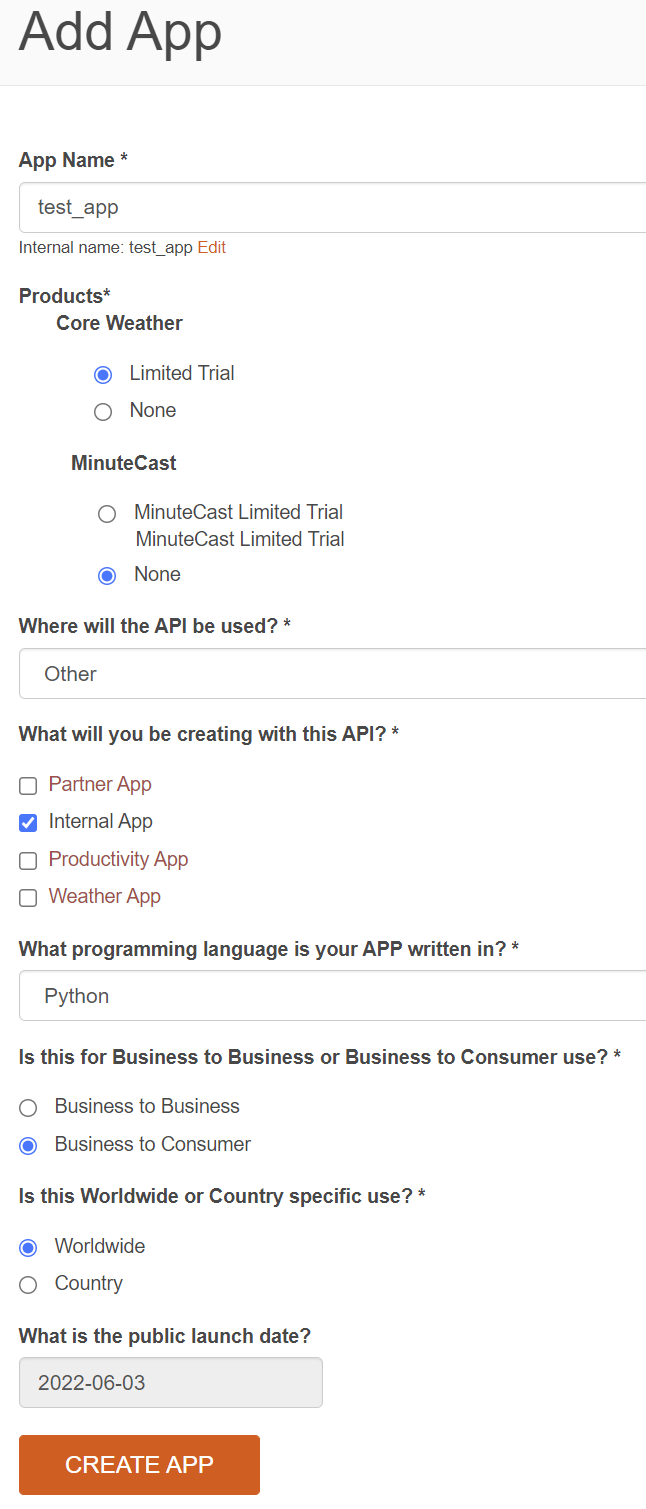

Tu nueva aplicación aparecerá en la lista de aplicaciones; haz clic en su nombre para expandirla y poder ver la clave API secreta (algo así como zC5JOYIAeAgn92Z9CJKUQE1ns3dvHeyf).
Ahora que ya tienes tu clave para trabajar con la API de AccuWeather, puedes obtener información útil a través de su API, por ejemplo, el pronóstico para los próximos 5 días en un lugar concreto.

Primero, necesitamos obtener el identificador de ubicación de AccuWeather llamando a su API de ubicación y obteniendo los identificadores por el nombre de la ubicación (esta es solo una posibilidad). Lo buscaremos por el nombre 'New York'.

In [8]:
api_key = 'zC5JOYIAeAgn92Z9CJKUQE1ns3dvHeyf'  # este es un ejemplo de la clave API, no es real
params = {'apikey': api_key, 'q': 'New York'}

aw_location_url = "https://dataservice.accuweather.com/locations/v1/cities/search"
aw_location_res = requests.get(aw_location_url, params=params)

El resultado devuelto es una lista de ubicaciones que AccuWeather asocia con el nombre dado. Está en formato JSON y contiene bastantes campos (documentados aquí), que podemos auditar simplemente imprimiendo el resultado completo.

In [9]:
import pprint

pprint.pprint(aw_location_res.json())

{'Code': 'Unauthorized',
 'Message': 'Api Authorization failed',
 'Reference': '/locations/v1/cities/search?apikey=zC5JOYIAeAgn92Z9CJKUQE1ns3dvHeyf&q=New%20York'}


Es una estructura larga, por lo que podría ser más conveniente iterar sobre la lista e imprimir solo un conjunto de campos seleccionados para comprender qué ubicación es exactamente esa 'New York' que nos interesa.

In [ ]:
for loc_info in aw_location_res.json():
    print('{:>8}   {:10}   {:16}    {:16}'.format(
        loc_info['Key'],
        loc_info['EnglishName'],
        loc_info['Country']['EnglishName'],
        loc_info['AdministrativeArea']['EnglishName']))

349727   New York     United States       New York        
  710949   New York     United Kingdom      Lincolnshire    
 2531279   New York     United Kingdom      North Tyneside  
 2245721   New York     United States       Florida         
 2213492   New York     United States       Iowa            
 2179646   New York     United States       Kentucky        
 2212053   New York     United States       New Mexico      
 2185062   New York     United States       Texas

¡Vaya, sí que hay varias ciudades de New York! Digamos que nos interesa la New York de la primera línea. Ahora, al conocer la clave de ubicación, podemos consultar el pronóstico para esa ubicación llamando a un endpoint diferente desde AccuWeather Forecast API.

In [ ]:

api_key = 'zC5JOYIAeAgn92Z9CJKUQE1ns3dvHeyf'
params = {'apikey': api_key, 'metric': True}

location_id = 349727
aw_forecast_url = "https://dataservice.accuweather.com/forecasts/v1/daily/5day/" + str(location_id)
aw_forecast_res = requests.get(aw_forecast_url, params=params)

El resultado también es una estructura JSON extensa (documentada aquí). Como en el caso anterior, podemos imprimir y analizarla entera, pero nos ahorraremos esta parte y nos limitaremos a imprimir los campos que más nos interesen.

In [ ]:
for daily_forecast in aw_forecast_res.json()['DailyForecasts']:
    print('{}   {:30} {}{}  {}{}'.format(
        daily_forecast['Date'], 
        daily_forecast['Day']['IconPhrase'], 
        daily_forecast['Temperature']['Minimum']['Value'],
        daily_forecast['Temperature']['Minimum']['Unit'], 
        daily_forecast['Temperature']['Maximum']['Value'],
        daily_forecast['Temperature']['Maximum']['Unit']))

2022-06-05T07:00:00-04:00   Mostly sunny                   15.6C  25.0C
2022-06-06T07:00:00-04:00   Partly sunny                   17.2C  26.0C
2022-06-07T07:00:00-04:00   Intermittent clouds            18.9C  25.6C
2022-06-08T07:00:00-04:00   Showers                        18.1C  25.6C
2022-06-09T07:00:00-04:00   Partly sunny w/ t-storms       16.4C  25.7C

Así de fácil, gracias a la API tenemos la previsión de 5 días para New York. Esto es bastante impresionante si tenemos en cuenta que podemos integrar este tipo de cosas en nuestras propias aplicaciones, sistemas domésticos inteligentes y muchas otras aplicaciones o dispositivos: ¡el único límite es nuestra imaginación!

Un ejemplo conocido para muchos de nosotros y nosotras es un programa meteorológico o un widget en un teléfono inteligente, que llama internamente a uno de los proveedores de condiciones meteorológicas para mostrártelo en la pantalla en un formato comprensible para los humanos.

Conclusión

Los sitios web, las aplicaciones y otros proveedores de información dependen de muchos recursos/servicios web específicos detrás del escenario, que están integrados entre aplicaciones, llamándose entre sí para obtener información. En este proceso, las API, en particular la API HTTP, juegan un papel fundamental al proporcionar un "lenguaje" común que permite a los distintos servicios entenderse entre sí.

Para un especialista en datos, los recursos web representan valiosas fuentes de información. La habilidad de programar estos datos nos permite integrarlos fácilmente en nuestros propios programas y utilizarlos en flujos de trabajo específicos. Esto nos brinda la capacidad de analizar datos, construir modelos y realizar muchas otras tareas importantes.

Recursos adicionales
Lista de códigos de estado HTTP: https://es.wikipedia.org/wiki/Anexo:Códigos_de_estado_HTTP. Comprobar el significado de un código de estado desconocido puede ser muy útil.


Importa requests.
Llama al endpoint mediante la url proporcionada. Recupera el resultado en formato JSON aplicándole el método apropiado. Guarda la JSON resultante en la variable response.
Muestra artistDisplayName desde JSON llamándolo por la clave.



Ejercicio

1.

La API web es una herramienta versátil utilizada por más que solo empresas: hay muchos museos, bibliotecas, proyectos científicos y entusiastas que ponen su información y servicios a disposición del público en general. Utiliza la librería requests y el endpoint proporcionado en la url para obtener información sobre una pintura de la colección del Museo Metropolitano. Examina la URL: el enlace base es https://collectionapi.metmuseum.org/, luego nos dirigimos a un recurso específico. En algún momento hay una parte v1. Esta es la versión de la API. Las diferentes versiones pueden actuar de manera diferente, por lo que es común reflejar la actual. Finalmente, el número 437133 es la identificación de la pintura.

Importa requests.
Llama al endpoint mediante la url proporcionada. Recupera el resultado en formato JSON aplicándole el método apropiado. Guarda la JSON resultante en la variable response.
Muestra artistDisplayName desde JSON llamándolo por la clave.


In [ ]:
import requests

base_url = 'https://collectionapi.metmuseum.org/'
url = base_url + 'public/collection/v1/objects/437133'
# Solicitud GET peticion HTTP
response = requests.get(url)

# Convertir respuesta a diccionario python con JSON
data = response.json()

# Imprimir nombre del Artista accedidendo a la clave
print(data['artistDisplayName'])

Claude Monet


Podemos obtener mucha información con una sola solicitud, a menudo es información más detallada que la que podemos ver en una API de alojamiento de sitios web.

Ejercicio

2.

Para llegar al endpoint public/collection/v1/departments utilizando la misma URL base, simplemente agrega public/collection/v1/departments a la URL base. Guarda la URL resultante en la variable url.

A continuación, en el precódigo, verás una línea donde almacenamos la respuesta del endpoint y la guardamos en la variable response.

Tu objetivo ahora es convertir la respuesta en un archivo JSON. Luego, itera sobre response.json()['departments'] y muestra los que tienen 'Art' en dpt['displayName'].

In [19]:
base_url = 'https://collectionapi.metmuseum.org/'
url = base_url + 'public/collection/v1/departments' # escribe tu código aquí

response = requests.get(url)

for dpt in response.json()['departments']:
    if 'Art' in dpt['displayName']:# escribe tu código aquí
        print(dpt)

{'departmentId': 1, 'displayName': 'American Decorative Arts'}
{'departmentId': 3, 'displayName': 'Ancient Near Eastern Art'}
{'departmentId': 5, 'displayName': 'Arts of Africa, Oceania, and the Americas'}
{'departmentId': 6, 'displayName': 'Asian Art'}
{'departmentId': 10, 'displayName': 'Egyptian Art'}
{'departmentId': 12, 'displayName': 'European Sculpture and Decorative Arts'}
{'departmentId': 13, 'displayName': 'Greek and Roman Art'}
{'departmentId': 14, 'displayName': 'Islamic Art'}
{'departmentId': 17, 'displayName': 'Medieval Art'}
{'departmentId': 21, 'displayName': 'Modern Art'}


Increíble! Tenemos la lista completa de los departamentos de arte del museo sin tener que navegar por su sitio.

Ejercicio

3.

En esta tarea, utilizarás parámetros de solicitud. La URL de esta tarea se ha guardado en la variable url. Tu objetivo es establecer params = {'limit': 3} cuando utilices el método get(). Esto permitirá recuperar solo las tres primeras entradas. Almacena la respuesta en la variable response, luego conviértela a JSON y muéstrala.

In [20]:
import requests

url = 'https://dummyjson.com/products'

params  = {'limit': 3} # escribe tu código aquí
response = requests.get(url, params=params)# escribe tu código aquí
print(response.json()) # escribe tu código aquí

{'products': [{'id': 1, 'title': 'Essence Mascara Lash Princess', 'description': 'The Essence Mascara Lash Princess is a popular mascara known for its volumizing and lengthening effects. Achieve dramatic lashes with this long-lasting and cruelty-free formula.', 'category': 'beauty', 'price': 9.99, 'discountPercentage': 7.17, 'rating': 4.94, 'stock': 5, 'tags': ['beauty', 'mascara'], 'brand': 'Essence', 'sku': 'RCH45Q1A', 'weight': 2, 'dimensions': {'width': 23.17, 'height': 14.43, 'depth': 28.01}, 'warrantyInformation': '1 month warranty', 'shippingInformation': 'Ships in 1 month', 'availabilityStatus': 'Low Stock', 'reviews': [{'rating': 2, 'comment': 'Very unhappy with my purchase!', 'date': '2024-05-23T08:56:21.618Z', 'reviewerName': 'John Doe', 'reviewerEmail': 'john.doe@x.dummyjson.com'}, {'rating': 2, 'comment': 'Not as described!', 'date': '2024-05-23T08:56:21.618Z', 'reviewerName': 'Nolan Gonzalez', 'reviewerEmail': 'nolan.gonzalez@x.dummyjson.com'}, {'rating': 5, 'comment': 'V

Los parámetros para la API web son como argumentos para las funciones de Python, definen detalles específicos del resultado devuelto.